In [166]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz
import warnings
warnings.filterwarnings(action='ignore') 

In [167]:
###1.데이터 수집&확인
hfa=pd.read_csv('C:/data.arff')
hfa.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [168]:
hfa.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [169]:
hfa.replace("?",np.nan,inplace=True)
hfa.isnull().sum() 

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [170]:
print("old : {}".format(len(hfa)))
    
hfa=hfa[-(hfa['age'].isnull())& 
        -(hfa['ethnicity'].isnull())&
        -(hfa['relation'].isnull())]

print("new : {}".format(len(hfa))) 

old : 704
new : 609


In [171]:
hfa.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

In [172]:
hfa['age'] = pd.to_numeric(hfa['age'])

In [173]:
hfa = hfa.replace({'gender': {'m':1,'f':2}})
hfa.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           609 non-null int64
A2_Score           609 non-null int64
A3_Score           609 non-null int64
A4_Score           609 non-null int64
A5_Score           609 non-null int64
A6_Score           609 non-null int64
A7_Score           609 non-null int64
A8_Score           609 non-null int64
A9_Score           609 non-null int64
A10_Score          609 non-null int64
age                609 non-null int64
gender             609 non-null int64
ethnicity          609 non-null object
jundice            609 non-null object
austim             609 non-null object
contry_of_res      609 non-null object
used_app_before    609 non-null object
result             609 non-null int64
age_desc           609 non-null object
relation           609 non-null object
Class/ASD          609 non-null object
dtypes: int64(13), object(8)
memory usage: 104.7+ KB


In [174]:
hfa.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,2,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,1,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,1,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,2,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
5,1,1,1,1,1,0,1,1,1,1,...,1,Others,yes,no,'United States',no,9,'18 and more',Self,YES


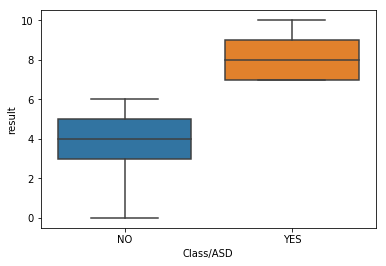

In [175]:

import seaborn as sns

p1=sns.boxplot(x='Class/ASD',y='result',data=hfa)
p1 

In [176]:
#p2=sns.boxplot(x='Class/ASD',y='age',data=hfa)
#p2 

#agemean = int(hfa['age'].mean())
#print(agemean)
hfa.loc[hfa.age == 383, 'age'] = 30
#hfa[hfa['age'] == hfa['age'].max()]['age'] = agemean
hfa['age'].max()
#print(hfa['age'].max())

64

In [177]:
#data분리-train,test

X=hfa.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,17]]
y=hfa.iloc[:,20:21]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

print(X.head())
print(y.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
5         1         1         1         1         1         0         1   

   A8_Score  A9_Score  A10_Score  age  gender  result  
0         1         0          0   26       2       6  
1         1         0          1   24       1       5  
2         1         1          1   27       1       8  
3         1         0          1   35       2       6  
5         1         1          1   36       1       9  
  Class/ASD
0        NO
1        NO
2       YES
3        NO
5       YES


In [178]:
#scaling 4가지 시도
# scale(x) : 기본 스케일, 평균과 표준편차 사용
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X_train1=scaler1.fit(X_train)
X_train1=scaler1.transform(X_train)
X_test1=scaler1.transform(X_test) 

# robust_scale(x) : 중앙값과 IQR 사용, 아웃라이어의 영향을 최소화
from sklearn.preprocessing import RobustScaler

scaler2 = RobustScaler()
X_train2=scaler2.fit(X_train)
X_train2=scaler2.transform(X_train)
X_test2=scaler2.transform(X_test)

# minmax_scale(x) : 최대/최소값이 각각 1,0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler3=MinMaxScaler()
X_train3=scaler3.fit(X_train)
X_train3=scaler3.transform(X_train)
X_test3=scaler3.transform(X_test)

# maxabs_scale(x) : 최대절대값과 0이 각각 1,0이 되도록 스케일링
from sklearn.preprocessing import MaxAbsScaler
scaler4=MaxAbsScaler()
X_train4=scaler4.fit(X_train)
X_train4=scaler4.transform(X_train)
X_test4=scaler4.transform(X_test)

print("X_train1 :\n", X_train1)
print()
print("X_train2 :\n", X_train2)
print()
print("X_train3 :\n",X_train3) 
print()
print("X_train4 :\n",X_train4)
print()
print()
print("X_test1 :\n", X_test1)
print()
print("X_test2 :\n", X_test2)
print()
print("X_test3 :\n",X_test3) 
print()
print("X_test4 :\n",X_test4) 

X_train1 :
 [[-1.69245584 -0.94451902 -0.95706133 ... -0.16615691  1.08232554
  -1.20471885]
 [ 0.59085737  1.05873993  1.04486512 ... -0.3780941   1.08232554
   0.399228  ]
 [ 0.59085737  1.05873993  1.04486512 ...  0.15174889 -0.92393644
   1.60218813]
 ...
 [ 0.59085737  1.05873993 -0.95706133 ...  0.25771749  1.08232554
   0.80021471]
 [-1.69245584  1.05873993 -0.95706133 ...  1.10546629  1.08232554
  -1.20471885]
 [ 0.59085737 -0.94451902  1.04486512 ...  0.89352909  1.08232554
   0.80021471]]

X_train2 :
 [[-1.          0.          0.         ...  0.07692308  1.
  -0.75      ]
 [ 0.          1.          1.         ... -0.07692308  1.
   0.25      ]
 [ 0.          1.          1.         ...  0.30769231  0.
   1.        ]
 ...
 [ 0.          1.          0.         ...  0.38461538  1.
   0.5       ]
 [-1.          1.          0.         ...  1.          1.
  -0.75      ]
 [ 0.          0.          1.         ...  0.84615385  1.
   0.5       ]]

X_train3 :
 [[0.         0.         0.

In [179]:
from sklearn.svm import SVC

svc = SVC() # default value : 'auto'(C=1 and gamma = 1 / X_train.shape(1))
svc.fit(X_train1,y_train)
svc.fit(X_train2,y_train)
svc.fit(X_train3,y_train)
svc.fit(X_train4,y_train)

print("train accuracy1 = {}".format(svc.score(X_train1,y_train)))
print("test accuracy1 = {}".format(svc.score(X_test1,y_test)))
print()
print("train accuracy2 = {}".format(svc.score(X_train2,y_train)))
print("test accuracy2 = {}".format(svc.score(X_test2,y_test)))
print()
print("train accuracy3 = {}".format(svc.score(X_train3,y_train)))
print("test accuracy3 = {}".format(svc.score(X_test3,y_test)))
print()
print("train accuracy4 = {}".format(svc.score(X_train4,y_train)))
print("test accuracy4 = {}".format(svc.score(X_test4,y_test)))


train accuracy1 = 0.8464912280701754
test accuracy1 = 0.7973856209150327

train accuracy2 = 0.7236842105263158
test accuracy2 = 0.6470588235294118

train accuracy3 = 0.9780701754385965
test accuracy3 = 0.9607843137254902

train accuracy4 = 0.9912280701754386
test accuracy4 = 0.9803921568627451


In [180]:

# C=1 -> C=10 #

svc = SVC(C=10)

svc.fit(X_train1,y_train)
svc.fit(X_train2,y_train)
svc.fit(X_train3,y_train)
svc.fit(X_train4,y_train)

print("train accuracy1 = {}".format(svc.score(X_train1,y_train)))
print("test accuracy1 = {}".format(svc.score(X_test1,y_test)))
print()
print("train accuracy2 = {}".format(svc.score(X_train2,y_train)))
print("test accuracy2 = {}".format(svc.score(X_test2,y_test)))
print()
print("train accuracy3 = {}".format(svc.score(X_train3,y_train)))
print("test accuracy3 = {}".format(svc.score(X_test3,y_test)))
print()
print("train accuracy4 = {}".format(svc.score(X_train4,y_train)))
print("test accuracy4 = {}".format(svc.score(X_test4,y_test)))


train accuracy1 = 0.8421052631578947
test accuracy1 = 0.7843137254901961

train accuracy2 = 0.7236842105263158
test accuracy2 = 0.6470588235294118

train accuracy3 = 1.0
test accuracy3 = 1.0

train accuracy4 = 1.0
test accuracy4 = 1.0
